In [1]:
%matplotlib widget

In [2]:
from mp_api.client import MPRester
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from pymatgen.io.vasp import Chgcar
from pymatgen.analysis.graphs import StructureGraph
from pymatgen.analysis.local_env import MinimumDistanceNN

CHGCAR_DIRECTORY = Path("/media/tw/HDD/materials_project/charge_density/")

No module named 'phonopy'
No module named 'phonopy'


In [138]:
chgcar = Chgcar.from_file(CHGCAR_DIRECTORY/"mp-30")
structure = chgcar.structure.make_supercell((2, 2, 2))
neighbour_strategy = MinimumDistanceNN(tol = 1, cutoff=max(structure.lattice.abc), get_all_sites=True)
structure_graph = StructureGraph.with_local_env_strategy(structure, neighbour_strategy, weights=True)
graph = structure_graph.graph

FileNotFoundError: [Errno 2] No such file or directory: '/media/tw/HDD/materials_project/charge_density/mp-30'

In [136]:
structure_graph.structure[0].specie.name

'S'

In [137]:
for u, v, data in graph.edges(data=True):
    if 'weight' in data:
        #print(data['weight'])
        data['weight'] = (data['weight']/5)**8

for node, data in graph.nodes(data=True):
    data["element"] = structure_graph.structure[node].specie.name

In [134]:
graph.nodes(data=True)

NodeDataView({0: {'element': 'S'}, 1: {'element': 'S'}, 2: {'element': 'S'}, 3: {'element': 'S'}, 4: {'element': 'S'}, 5: {'element': 'S'}, 6: {'element': 'S'}, 7: {'element': 'S'}, 8: {'element': 'S'}, 9: {'element': 'S'}, 10: {'element': 'S'}, 11: {'element': 'S'}, 12: {'element': 'S'}, 13: {'element': 'S'}, 14: {'element': 'S'}, 15: {'element': 'S'}, 16: {'element': 'S'}, 17: {'element': 'S'}, 18: {'element': 'S'}, 19: {'element': 'S'}, 20: {'element': 'S'}, 21: {'element': 'S'}, 22: {'element': 'S'}, 23: {'element': 'S'}, 24: {'element': 'S'}, 25: {'element': 'S'}, 26: {'element': 'S'}, 27: {'element': 'S'}, 28: {'element': 'S'}, 29: {'element': 'S'}, 30: {'element': 'S'}, 31: {'element': 'S'}, 32: {'element': 'S'}, 33: {'element': 'S'}, 34: {'element': 'S'}, 35: {'element': 'S'}, 36: {'element': 'S'}, 37: {'element': 'S'}, 38: {'element': 'S'}, 39: {'element': 'S'}, 40: {'element': 'S'}, 41: {'element': 'S'}, 42: {'element': 'S'}, 43: {'element': 'S'}, 44: {'element': 'S'}, 45: {'

In [109]:
def show_structure_graph(structure_graph):
    ax = plt.figure().add_subplot(projection='3d')

    pos = {}
    for i, site in enumerate(structure_graph.structure.sites):
        ax.scatter(*site.coords)
        pos[i] = site.coords

    for i, j, _ in structure_graph.graph.edges:
        x_y_z = np.stack([pos[i], pos[j]]).T
        ax.plot(*x_y_z)

    plt.show()

In [115]:
def sublattice_minimum_spanning_tree(graph, element):
    """Get a subgraph of minimum total wieght that connects all nodes of an element"""
    nodes_subset = [node for node, data in graph.nodes(data=True) if data["element"] == element]

    # Create a complete graph with the shortest paths between nodes in the subset
    h = nx.complete_graph(nodes_subset)
    for u in h.nodes():
        for v in h.nodes():
            if u != v:
                # Use shortest_path_length to get the weight for the edge
                path = nx.shortest_path(graph, source=u, target=v, weight="wieght")
                h[u][v]['path'] = path
                h[u][v]['weight'] = nx.path_weight(graph, path, weight="weight")

    h_mst = nx.minimum_spanning_tree(h)
    return h_mst


ValueError: not enough values to unpack (expected 3, got 2)

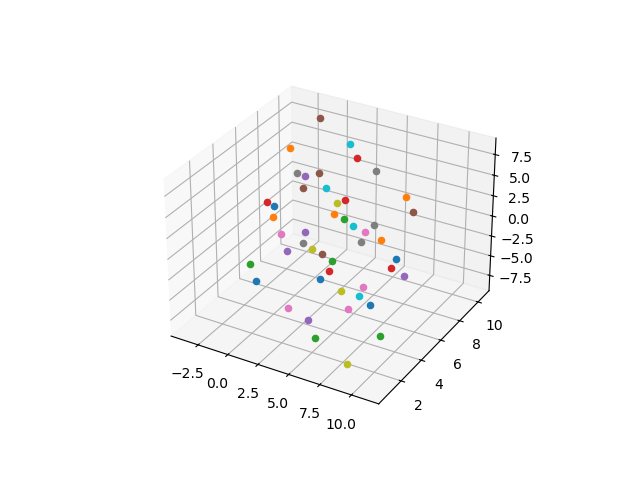

In [116]:
sub_mst = sublattice_minimum_spanning_tree(graph.to_undirected(), "S")
structure_graph.graph = sub_mst
show_structure_graph(structure_graph)

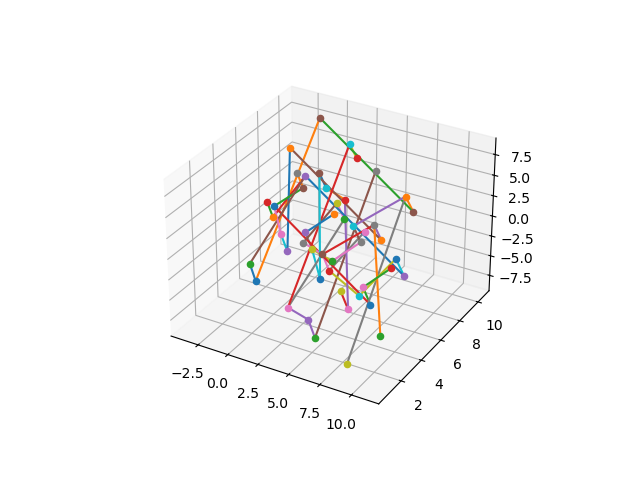

In [99]:
mst = nx.minimum_spanning_tree(graph.to_undirected())
structure_graph.graph = mst
show_structure_graph(structure_graph)